### 1. Plotting

In [1]:
@interact #세 점 (a, 1), (b, 0), (c, 0)을 지나는 다항식의 그래프
def my_lag(a=0, b=1, c=2):
    f = (x-b)*(x-c)/((a-b)*(a-c))
    P = plot(f,(x,min(a, b, c)-1, max(a, b, c)+1), figsize=4)
    Q = point([(a, 1), (b, 0), (c, 0)], color="red")
    (P+Q).show()

Interactive function <function my_lag at 0x6fd32f03d08> with 3 widgets
  a: IntSlider(value=0, description='a'…

### 2. Plotting with Lagrange equation
- P : Lagrange equation, R : Basic polynomial constituting a lagrange polynomial, Q : three points

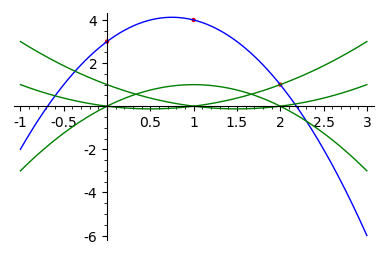

In [2]:
#세 점 (0, 3), (1, 4), (2, 1)을 지나는 다항식의 그래프

v = [(0, 3), (1, 4), (2, 1)]

f1 = (x-v[1][0])*(x-v[2][0])/((v[0][0]-v[1][0])*(v[0][0]-v[2][0]))
f2 = (x-v[0][0])*(x-v[2][0])/((v[1][0]-v[0][0])*(v[1][0]-v[2][0]))
f3 = (x-v[0][0])*(x-v[1][0])/((v[2][0]-v[0][0])*(v[1][0]-v[0][0]))

f = v[0][1]*f1 + v[1][1]*f2 + v[2][1]*f3

P = plot(f,(x,min(v[0][0], v[1][0], v[2][0])-1, max(v[0][0], v[1][0], v[2][0])+1),\
   figsize=4)
R = plot((f1, f2, f3),(x,min(v[0][0], v[1][0], v[2][0])-1, max(v[0][0], v[1][0], v[2][0])+1),\
   figsize=4, color="green")
Q = point(v, color="red")

(P+Q+R).show()

### 3. 자연수 p로 나눈 나머지들의 곱셈표
- 고정된 자연수 p로 나눈 나머지들 사이에서 라그랑지 다항식을 구현하려면 나눗셈이 가능해야 합니다.
즉, 0이 아닌 나머지는 항상 곱해서 1이 되는 나머지가 있어야 합니다.  
- 아래에서 자연수 p로 나눈 나머지들의 곱셈표를 보여줍니다.
p가 소수인 경우와 그렇지 않은 경우(가령 8이나 10)에 첫번째 행과 열을 제외한 부분에서
1이 항상 나오는지 그렇지 않은지 확인해보세요.

In [3]:
p=7
v=[]
for i in range(p):
    v1=[]
    for j in range(p):
        v1.append(Mod(i*j, p))
    v.append(v1)

for i in range(p):
    print(v[i])

[0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6]
[0, 2, 4, 6, 1, 3, 5]
[0, 3, 6, 2, 5, 1, 4]
[0, 4, 1, 5, 2, 6, 3]
[0, 5, 3, 1, 6, 4, 2]
[0, 6, 5, 4, 3, 2, 1]


### 4. Shamir의 (3, 5) - 비밀공유방식
    1. 먼저 주어진 비밀문장을 256진법을 이용하여 숫자 M으로 변환
    2. 비밀 M보다 큰 소수 p 생성
    3. 계수들이 p로 나눈 나머지(GF(p)의 원소)인 다항식들의 공간 R 생성
    4. M을 상수항으로 하고 나머지 항들은 임의의 값인 2차식 f 생성
    5. 5개의 비밀조각 (1, f(1)), (2, f(2)), (3, f(3)), (4, f(4)), (5, f(5)) 생성

In [4]:
s = 'Hi'
M = sum(ord(s[i])*256^i for i in range(len(s))) #비밀문장을 숫자로 변환
p = random_prime(M*10, M*2) #비밀 M보다 큰 소수
print('p=', p)

R.<x> = GF(p)[x]  # p로 나눈 나머지들을 계수로 갖고 x를 미지수로 하는 다항식들
f = M  + Mod(ZZ.random_element(p),p)*x + Mod(ZZ.random_element(p),p)*x^2 
# 상수항이 바로 비밀 M이고 나머지 항들은 임의의 수들로 만든 2차식

print('f=', f)
print (1, f(1)), (2, f(2)), (3, f(3)), (4, f(4)), (5, f(5))
# 5개의 비밀조각

p= 174637
f= 50989*x^2 + 27291*x + 26952
1 105232


(None, (2, 110853), (3, 43815), (4, 78755), (5, 41036))

In [5]:
p=78607
v=[(1, 10886), (2, 42972), (5, 35107)]
R.<x> = GF(p)[x]

s = Mod(10886, p)*(x-2)*(x-5)/Mod((1-2)*(1-5), p) \
+  Mod(42972, p)*(x-1)*(x-5)/Mod((2-1)*(2-5), p) \
+ Mod(35107, p)*(x-1)*(x-2)/Mod((5-1)*(5-2), p) 

print(s)

f = R.lagrange_polynomial(v)
print(f)

24076*x^2 + 38465*x + 26952
24076*x^2 + 38465*x + 26952


### 5. Shamir의 (t, m) - 비밀공유방식(threshold scheme)

In [6]:
def Bimil2(s, t, m):   # t개 이상의 비밀조각이 모이면 비밀을 알아내는 코드
    s = str(s) # 비밀은 문자열
    M = sum(ord(s[i])*256^i for i in range(len(s))) # 비밀을 숫자로 바굼
    p = random_prime(M*10, M*2)
    R.<x> = GF(p)['x']  # p로 나눈 나머지들을 계수로 갖고 x를 미지수로 하는 다항식들
    f = M   # 비밀은 상수항
    
    for i in range(1, t):
        f = f + Mod(ZZ.random_element(p),p)*x^i # 나머지 항들은 임의의 수로
    
    v=[]
    for i in range(1, m+1):
        v.append((i, f(i)))
        
    return p, f, v

Bimil2('Hello', 4, 8)

(3561640717507,
 2906876683471*x^3 + 1977129518337*x^2 + 2695503948972*x + 478560413000,
 [(1, 934789128766),
  (2, 1416692676990),
  (3, 1557327570963),
  (4, 989750323976),
  (5, 2908658166827),
  (6, 3385466895300),
  (7, 2053233022686),
  (8, 2106653779783)])

In [7]:
def Bomul2(p, v): 
   
    R.<x> = GF(p)['x'] # p로 나눈 나머지들을 계수로 갖고 x를 미지수로 하는 다항식들
    f = R.lagrange_polynomial(v); 
    M = lift(f(0)) 
    
    v=[]
    while M != 0:
        v.append(chr(M % 256))
        M = M//256 # this replaces n by floor(n/256).
    return ''.join(v)


Bomul2(4389394056821,  [(3, 3100430341689),  (4, 1061722902032),  (5, 3419208830193)])

'Hello'